# Computação Evolucionária
## Trabalho Prático 1
Amanda Kellen Soares de Pinho - 2017098188

Lucas Araujo Azevedo - 2017104188

# Questão 1
## a)

Para calcular a probabilidade temos que cada caracter da string alvo tenha `26+1` chances que cair corretamente (26 maiúsculas letras no alfabeto e maiúsculas, 1 caracter de espaço). Temos que para cada letra um total de 53  possíveis opções. Para que nossa frase seja exatamente igual na primeira tentativa temos a seguinte cáculo: 1/(53^28), sendo 28 a nossa quantidade de caracteres o que nos resulta em uma probabilidade de **1/4161536836220038342098551818958537752576** que é igual a **2.402958424629275e-40%**.

## b)

O algoritmo genético supera essa probabilidade por conta que ele corta o espaço de probabilidade de letras, então ele vai decrescendo essa probabilidade (ele vai evoluindo a cada interação), com essa diminuição do espaço possível para os caracteres ele converje mais rapidamente.

## c)

Para trabalhar com as letras mapearemos nosso univerço codificando cada letra um número.

In [8]:
import numpy as np
import pandas as pd
import random
import math

np.random.seed(42)

In [9]:
universo = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5,
            "F": 6, "G": 7, "H": 8, "I": 9, "J": 10,
            "K": 11, "L": 12, "M": 13, "N": 14, "O": 15,
            "P": 16, "Q": 17, "R": 18, "S": 19, "T": 20,
            "U": 21, "V": 22, "W": 23, "X": 24, "Y": 25, 
            "Z": 26, "*": 27}
inv_universo = {v: k for k, v in universo.items()}

In [10]:
def gen_individuo():
    return random.randint(1, 27)

# Operadores de Variação

## Mutation

Na nossa função de mutation recebe a porcentagem de mutação e multiplica pelo tamanho da nossa frase (27) gerando uma nova amostra com a quantidade de intens solicitados

In [11]:
def mutation(size_of_mutation):
    new_part = [gen_individuo() for x in range(0, size_of_mutation)]
    return new_part

# Execução do algoritmo

In [29]:
def gen_frase():
    frase = []
    num_frase = []
    for i in range(0, 27):
        frase.append(inv_universo[gen_individuo()])
        num_frase.append(gen_individuo())
    return frase, num_frase

def traduz_frase(num_frase):
    frase_trad = [inv_universo[x] for x in num_frase]
    return frase_trad

In [61]:
objetivo = 'METHINKS*IT*IS*LIKE*A*WEASEL'
objetivo = ['M', 'E', 'T', 'H', 'I', 'N', 'K', 'S', '*', 
            'I', 'T', '*', 
            'I', 'S', '*', 
            'L', 'I', 'K', 'E', '*', 
            'A', '*', 
            'W', 'E', 'A', 'S', 'E', 'L']
num_objetivo = [universo[x] for x in objetivo]

Para nosso algoritmo funcionar, iremos trabalhar com um conceito de distância que consistirá em subtrair nosso valor da string real da nossa string gerada, quanto mais próximo o valor das string, mais próxima essa distância será de zero, sendo assim nosso algoritmo poderá ser otimizado.

In [88]:
n_epocas = 1000
mutation_rate = 0.5
list_distancia = []
list_epocas = []

print(f"Frase original:\n\t{''.join(objetivo)}")
frase, num_frase = gen_frase()
print(f"Primeira frase gerada:\n\t{''.join(frase)}")

epc=0
while epc <= n_epocas and frase != objetivo:
    size_mutation = int(mutation_rate*27)
    last_i = 0 # Variavel criada para realizar mutacoes em todas as partes
    quant_mutation = math.ceil(size_mutation/27)+1
    for i in range(1, quant_mutation+1):
        lim_sup = i*size_mutation
        
        size_mutation = len(frase[last_i:lim_sup])
        new_part = mutation(size_mutation) 
        
        distancia_inicial = abs(sum(num_objetivo[last_i:lim_sup]) - 
                                sum(num_frase[last_i:lim_sup]))
        distancia_nova = abs(sum(num_objetivo[last_i:lim_sup]) - 
                             sum(new_part))
        if distancia_nova < distancia_inicial:
            num_frase[last_i:lim_sup] = new_part.copy()

    distancia_final = abs(sum(num_objetivo) - sum(num_frase))
    list_distancia.append(distancia_final)
    list_epocas.append(epc)
        #last_i = lim_sup
    epc+=1
    # print(''.join(traduz_frase(num_frase)))

print("Ultima Frase")
print('\t'+''.join(traduz_frase(num_frase)))

Frase original:
	METHINKS*IT*IS*LIKE*A*WEASEL
Primeira frase gerada:
	NDDOHUBFSFFMGVNPQKXJESCGLEB
Ultima Frase
	IIYJVPZGLTHSHNGEDOK*DTKZOZX


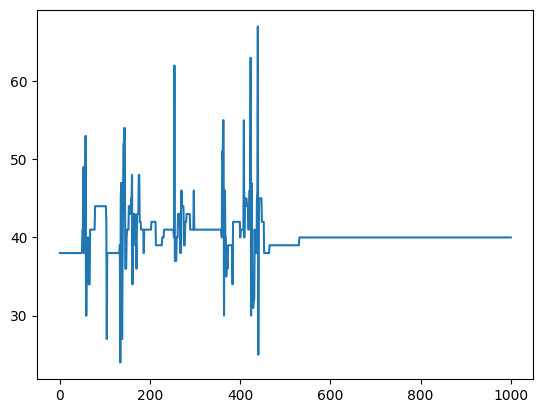

In [87]:
import matplotlib.pyplot as plt

plt.plot(list_epocas, list_distancia)
plt.show()